In [53]:
# Adding pip installs to ensure pyspark, findspark and gradio are installed
!pip install pyspark
!pip install findspark
!pip install gradio

In [1]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CSVReadExample").getOrCreate()

In [2]:
import findspark
findspark.init()

In [3]:
# Read the CSV file into a DataFrame and limit rows to 250,000
csv_file_path = "Resources/card_transdata.csv"
df = spark.read.csv(csv_file_path, header=True, inferSchema=True)
df = df.limit(250000)

In [4]:
 #Show the first few rows of the DataFrame
df.show()

+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+
|distance_from_home|distance_from_last_transaction|ratio_to_median_purchase_price|repeat_retailer|used_chip|used_pin_number|online_order|fraud|
+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+
| 57.87785658389723|            0.3111400080477545|            1.9459399775518593|            1.0|      1.0|            0.0|         0.0|  0.0|
|10.829942699255545|           0.17559150228166587|            1.2942188106198573|            1.0|      0.0|            0.0|         0.0|  0.0|
| 5.091079490616996|            0.8051525945853258|           0.42771456119427587|            1.0|      0.0|            0.0|         1.0|  0.0|
|2.2475643282963613|              5.60004354707232|           0.36266257805709584|            1.0|      1.0|            0.0|         1.0

In [5]:
df.count()

250000

In [6]:
dfgr = df.groupby( "fraud").mean()

In [7]:
from pyspark.sql.functions import col, when
from pyspark.sql.types import StringType,BooleanType,DateType

dfgr.show()

dfgr_pd = dfgr.toPandas()

+-----+-----------------------+-----------------------------------+-----------------------------------+--------------------+------------------+--------------------+------------------+----------+
|fraud|avg(distance_from_home)|avg(distance_from_last_transaction)|avg(ratio_to_median_purchase_price)|avg(repeat_retailer)|    avg(used_chip)|avg(used_pin_number)| avg(online_order)|avg(fraud)|
+-----+-----------------------+-----------------------------------+-----------------------------------+--------------------+------------------+--------------------+------------------+----------+
|  0.0|     22.906292535637263|                  4.263431823144445|                 1.4195719150866895|  0.8817976740620688|0.3603802098162465|   0.111233272739219|0.6244464399132701|       0.0|
|  1.0|      66.38104591484162|                 12.515710090663157|                  5.982628542796239|  0.8815941027413039|0.2555632342778162| 0.00322506334945865|0.9480764800737157|       1.0|
+-----+------------------

In [8]:
import numpy as np
import pandas as pd
import gradio as gr
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

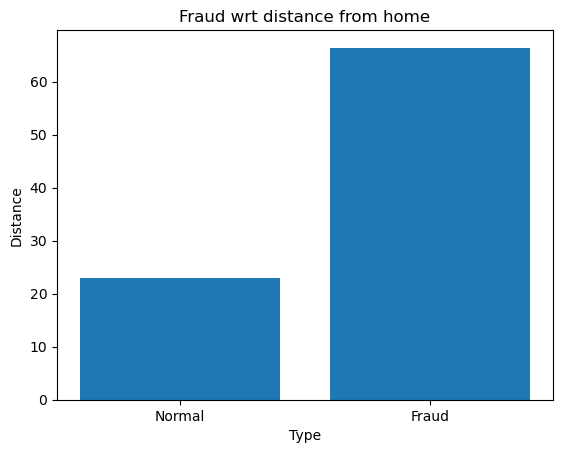

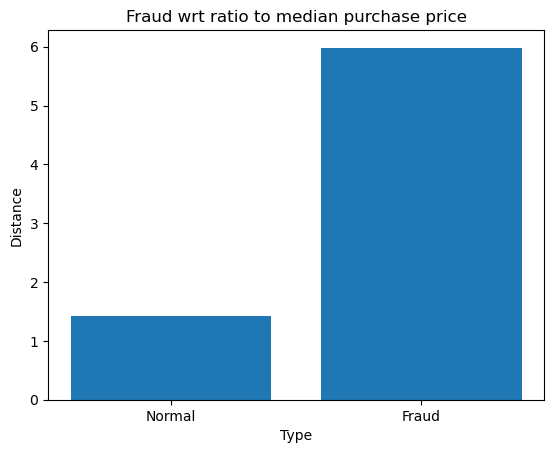

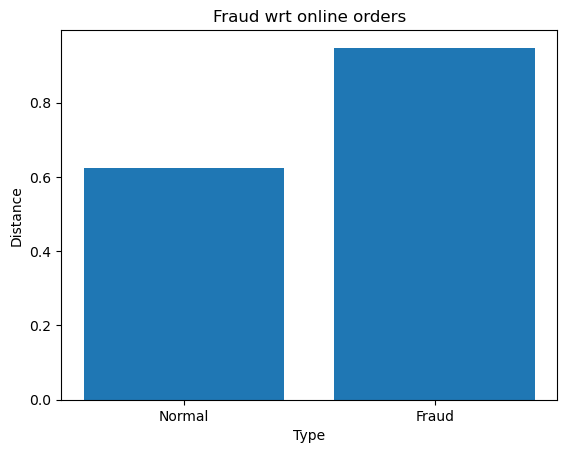

In [9]:
#for i in dfgr_pd:
#print(i)
plt.title("Fraud wrt distance from home")
plt.bar(["Normal","Fraud"],dfgr_pd["avg(distance_from_home)"])
plt.xlabel("Type")
plt.ylabel("Distance")
plt.show()
plt.title("Fraud wrt ratio to median purchase price")
plt.bar(["Normal","Fraud"],dfgr_pd["avg(ratio_to_median_purchase_price)"])
plt.xlabel("Type")
plt.ylabel("Distance")
plt.show()

plt.title("Fraud wrt online orders")
plt.bar(["Normal","Fraud"],dfgr_pd["avg(online_order)"])
plt.xlabel("Type")
plt.ylabel("Distance")
plt.show()


In [10]:
#convert the original spark dataframe to a pandas dataframe
original_df = df.toPandas()
# create the labels set (y) from the "fraud" column,a nd then create the features (X) DataFrame from the remaining columns.
# Separate the data into labels and features
# Separate the y variable, the labels

y = original_df['fraud']

# Separate the X variable, the features
X = original_df.drop(columns=['fraud'])

In [11]:
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0


In [12]:
# Check the balance of our target values
y.value_counts()

fraud
0.0    228295
1.0     21705
Name: count, dtype: int64

In [13]:
 # Split the data into training and testing datasets by using train_test_split.
 # Split the data using train_test_split
# Assign a random_state of 1 to the function

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [14]:
#Create a Logistic Regression Model with the Original Data
#Fit a logistic regression model by using the training data (X_train and y_train).

# Instantiate the Logistic Regression Model
# Assign a random_state parameter of  to the model
logistic_regression_model = LogisticRegression(random_state=1, max_iter=1000)

# Fit the model using training data
training_data_model = logistic_regression_model.fit(X_train, y_train)

In [15]:
#Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model.
# Make a prediction using the testing data
prediction_with_test_data = logistic_regression_model.predict(X_test)

In [16]:
# Print the balanced_accuracy score of the model
#balanced_accuracy_score(y_test,training_predictions)
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
balanced_accuracy_score = balanced_accuracy_score(y_test,prediction_with_test_data)
print(f"Balanced_accuracy_score : {balanced_accuracy_score}")

Balanced_accuracy_score : 0.7972733932077058


In [17]:
# Generate a confusion matrix for the model
generat_confusion_matrix = confusion_matrix(y_test,prediction_with_test_data)
print('Confusion Matrix is : ')
print(generat_confusion_matrix)

Confusion Matrix is : 
[[56727   347]
 [ 2167  3259]]


In [18]:
#instantiate StandardScaler object
scaler = StandardScaler()

#scale data
x_train_scaled = scaler.fit_transform(X_train)

x_test_scaled = scaler.fit_transform(X_test)

#import model object
from sklearn.neural_network import MLPClassifier
model =  MLPClassifier(max_iter=1000,  alpha=1)

#train model on training data
model.fit(x_train_scaled, y_train)

#getting model performance on test data
print("accuracy:", model.score(x_test_scaled, y_test))

accuracy: 0.974672


In [19]:
# Print the classification report for the model
classification_report_model = classification_report(y_test,prediction_with_test_data)
print('Classificication Report For The Model is')
print(classification_report_model)

Classificication Report For The Model is
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     57074
         1.0       0.90      0.60      0.72      5426

    accuracy                           0.96     62500
   macro avg       0.93      0.80      0.85     62500
weighted avg       0.96      0.96      0.96     62500



In [20]:
# The following method accepts inputs from the gradio interface and provides prediction output 
def credit_card_features(distance_from_home,	distance_from_last_transaction,	ratio_to_median_purchase_price,	repeat_retailer,	used_chip,	used_pin_number,	online_order):
#turning the arguments into a numpy array
  x = np.array([distance_from_home,	distance_from_last_transaction,	ratio_to_median_purchase_price,	repeat_retailer,	used_chip,	used_pin_number,	online_order])
  prediction = model.predict(x.reshape(1, -1))
  return prediction

# The models predicted output for above feature input is output to a text box on the gradio interface
outputs = gr.outputs.Textbox()

app = gr.Interface(fn=credit_card_features, inputs=['number','number','number','number','number','number','number'], outputs=outputs,description="This is a Credit Card  model")

In [21]:
# launching the app
app.launch(share=True,debug=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://4c906458fd2016fe54.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://4c906458fd2016fe54.gradio.live
